#Build an Artificial Neural Network (ANN) using TensorFlow and Keras

#1️⃣ Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#2️⃣ Generate Synthetic Classification Data

In [10]:
# Create synthetic dataset with 1000 samples, 20 features, and 2 output classes
X, y = make_classification(
    n_samples=1000,       # total samples
    n_features=20,        # number of input features
    n_informative=15,     # number of informative features
    n_redundant=5,        # redundant features
    n_classes=2,          # binary classification
    random_state=42
)

# Split the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence (mean = 0, std = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#3️⃣ Build the ANN Model

In [11]:
# Define a simple feedforward neural network
model = Sequential()

# Input layer + first hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, input_dim=20, activation='relu'))

# Second hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron (binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#4️⃣ Compile the Model

In [12]:
# Compile the ANN model
model.compile(
    optimizer='adam',                # Adam optimizer for better performance
    loss='binary_crossentropy',      # Loss function for binary classification
    metrics=['accuracy']             # Track accuracy during training
)


#5️⃣ Train the Model

In [13]:
# Train the ANN model on the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # validate on test set
    epochs=50,                         # number of training iterations
    batch_size=32,                     # samples per gradient update
    verbose=1                          # show progress bar
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4744 - loss: 0.8380 - val_accuracy: 0.5650 - val_loss: 0.6943
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5235 - loss: 0.7144 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6076 - loss: 0.6592 - val_accuracy: 0.6950 - val_loss: 0.6086
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6963 - loss: 0.6072 - val_accuracy: 0.7450 - val_loss: 0.5725
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7521 - loss: 0.5675 - val_accuracy: 0.7750 - val_loss: 0.5322
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8034 - loss: 0.5176 - val_accuracy: 0.8000 - val_loss: 0.4872
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8123 - loss: 0.4837 - val_accuracy: 0.8100 - val_loss: 0.4443
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8520 - loss: 0.4245 - val_accuracy: 0.8500 - va

#6️⃣ Evaluate the Model

In [14]:
# Evaluate performance on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 94.00%


#7️⃣  Plot Accuracy and Loss Graphs

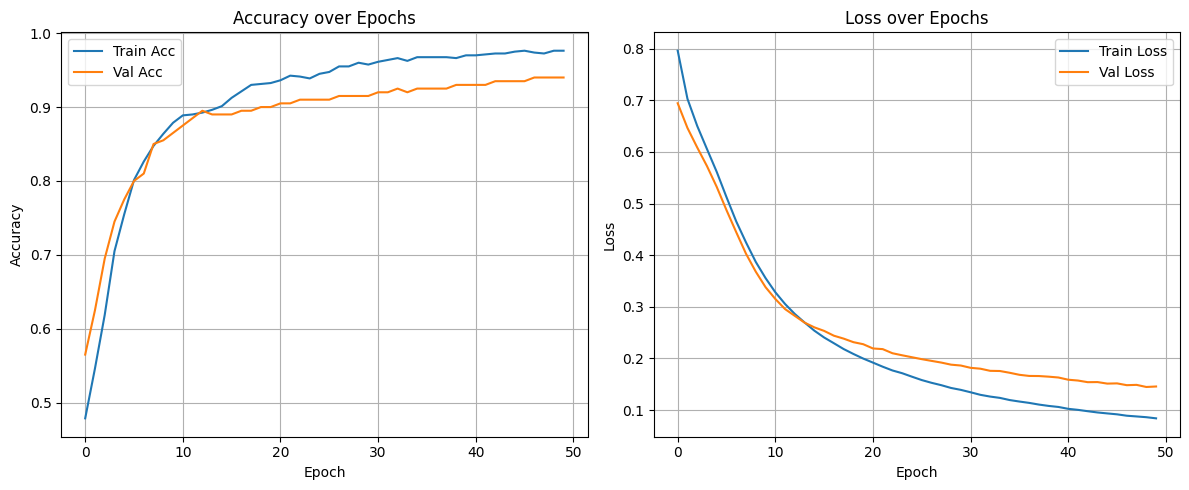

In [15]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#8️⃣ Predict on New Data

In [16]:
# Predict probabilities for test data
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Show first 10 predictions
print("Predicted Classes:", y_pred_classes[:10].ravel())
print("Actual Classes:   ", y_test[:10])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Classes: [0 1 0 0 1 1 1 0 1 0]
Actual Classes:    [0 1 1 0 1 1 1 0 1 0]


#🧠 Summary

- We successfully built an ANN model using TensorFlow and Keras.
- Used synthetic classification data for training and testing.
- Learned to visualize performance and evaluate predictions.
- This approach can now be adapted to real-world datasets.
